# (0) Usage Instructions
Before using the algorithm on your computer, there are some libraries you must install. Provided that you have the **latest** version of **python**, copy and paste these commands into the console.

1. pip install tensorflow
2. pip install numpy
3. pip install tkinter
4. pip install pillow

After installing the above-mentioned libraries you are good to go!!!

# (1) Introduction
One thing this pandemic has thought me was how reliant humanity is on technology from ordering products to assisting people in their professions. Due to the lack of hospital facilities around the world, I firmly believe that it is high time that we enhance our equipment to satisfy the mass amount of patients overflowing the hospitals every day. It is during times like these we realise that despite how advanced we become we are never prepared. Hence I am introducing my latest project in the advancement of **computer vision**, one that not only detects values to the highest precision but also generates results in the quickest. This isn't a solution to replacing doctors or the field of radiology, this algorithm is quite useless **for real purposes** * this algorithm just about shows how accurate I can derive the results for lungs with and without Pneumonia. That's right, this project is targeted in finding Pneumonia -like symptoms in the X-ray of the lungs and what it generates a value either 1 or 0 with **1 being has pneumonia** and **0 being doesn't have Pneumonia**. Okay now that we are clear that what this is intended for, let's look at the dataset shall we?


---

## (1)(a) The Dataset
As usual, the dataset is split into the training and the test set, but instead of being in an excel sheet, as all the data is images, the dataset is in a folder here is the architecture

|   File Path    | Description |
| ----------- | ----------- |
| train\NORMAL      | 1,342 images containing X-rays of normal lungs for training     |
| train\PNEUMONIA   | 3,876 images containing X-rays of lungs with pneumonia for training        |
| test\NORMAL      | 234  images containing X-rays of normal lungs for validation     |
| test\PNEUMONIA   | 390 images containing X-rays of lungs with pneumonia for validation       |


---
Before we enter the training let's explain some concepts based on convolutional neural networks and eventually the YOLO algorithm.


# Importing the libraries
The following code cell shows all the libraries I have imported to execute this procedure.

| Library      | Description |
| ----------- | ----------- |
| NumPy     | Used to work with arrays       |
|   TensorFlow | Used to build the deep neural network model        |
| Keras     | Used to pre-process the image for it to be fed into the neural network       |
| Time     | Used to calculate the time taken to train       |

In [ ]:
import numpy as np
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
import time

# Data Preprocessing
Before the image can be fed into the neural network, it must be processed in a way that is **compatible** with the Convolutional layer of the network. This is done in the below following steps.

## Preparing the Training-Set
The training set is **augmented** in the below code cell. What does that mean?? Basically images are augmented to avoid **overfitting** i.e, preventing the training of the model to be super reliant on the training images. This is dangerous as when a new image is introduced, and the new test image is slightly tilted or zoomed, the model will have a hard time picking up the features as the model is used to the **"perfect images"** in the training set. The types of augmentation we will be using are as follows:-

* Zoom
* [Shear-Range](https://stackoverflow.com/questions/57301330/what-exactly-the-shear-do-in-imagedatagenerator-of-keras)
* Horizontal Flip

***NOTE***:- rescale is used to normalize the pixel images between a value ranging from (0 - 1). This is just to ensure that the values are set at a standard.



In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
    )

## Fitting the images to the Training generator
The below line of code converts the images into a format, augments it and, eventually prepares the images. The parameters will be varied in **part 3** where I tweak the parameters to get a faster training time and a more accurate model.

In [ ]:
training_set = train_datagen.flow_from_directory(
    r'chest_xray/train',
    target_size = (416, 416),
    batch_size = 32,
    class_mode = 'binary'
    )

## Preparing the Test Set

In [ ]:
test_datagen = ImageDataGenerator(
    rescale = 1./255
    )

## Fitting the images to the Testing generator

In [ ]:
test_set = test_datagen.flow_from_directory(
    r'chest_xray/test',
    target_size = (416, 416),
    batch_size = 32,
    class_mode = 'binary'
    )

# (2) Convolutional Neural Networks (An Intuition)
The Convolutional Neural Network or CNN for short is an algorithm that is used in the image processing side of machine learning. This algorithm is basically an Artificial Neural Network that has **extra layers on top of it** that helps **process the images** in order for it to be compatible for the fully connected layer. You can click [here](https://github.com/codemasterady/Phone-Price-Predictor/blob/main/About_The_Model.ipynb) if you are unfamiliar with Artificial Neural Networks which will guide you to the notebook I have written about ANNs. Anyways now that we have a general idea, let's look into CNNs in more detail. The below line initializes the CNN architecture into which we will add the layers.

In [ ]:
cnn = tf.keras.models.Sequential()

## (2)(a) The Convolution Layer
This is the first layer the image goes through. This layer scans the image for some certain features using a feature-detector which is usually termed as a <ins>**filter**</ins> and using those filters it scans for certain features from the images that differentiate it from others. In the example of detecting pneumonia in the lungs, this model will scan the entire image and would try to separate any similarity between those images i.e what **features** do these images have in common. Using that knowledge, it can generate these filters. After this layer, the filters are sent to the pooling layer. Below is an image of the convolution layer and how it works.



---


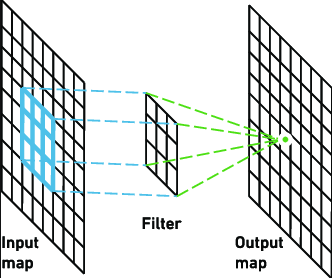

The below line of code represents the first convolutional layer. The underlined words in the above explanation cell represent the parameters that we will be using in the code. Below is the table of the parameters and their explanation.

| Parameter      | Description |
| ----------- | ----------- |
| filters      | The number of filters       |
| kernel_size   | The 2*2 tuple that represents the size of the filter        |
| strides      | (**Not Mentioned** ) The number of pixels the filter slides through the images     |
| [activation](https://github.com/codemasterady/Phone-Price-Predictor/blob/main/About_The_Model.ipynb)      | The activation function applied      |
| input_shape      | The size of the input filters (length, height, RGB)       |

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(416, 416, 3)))

## (2)(b) The Pooling Layer
This layer is used to further extract the features from the feature detector by separating the features of the image from the background. The concept of ignoring the background noise is known as **Spatial Invariance**. This is a useful step as it not only **reduces computational time** but also improves the accuracy of the model. This layer is usually followed up with another Convolutional layer. There are different types of poolings but the ones we will be using is known as [***Max-Pooling***](https://computersciencewiki.org/index.php/Max-pooling_/_Pooling#:~:text=Max%20pooling%20is%20a%20sample,in%20the%20sub%2Dregions%20binned.). This is the process in which the maximum value of the pixel within a defined window size, specified by the developer, is used in building another "filter-like" structure. There are many other pooling methods such as taking the **average, summation of, median** etc. Below is a pictographic representation of the pooling process.


---

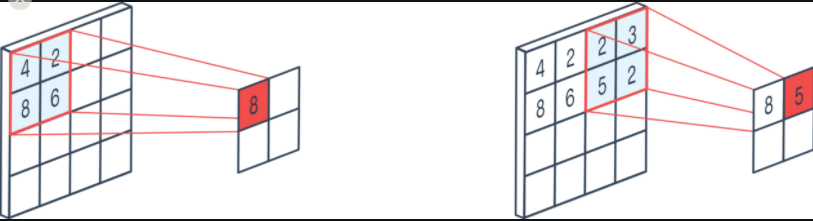

The below line of code represents the first Max-Pooling layer. Below is the table of the parameters and their explanation.
The below line of code represents the first Max-Pooling layer. The underlined words in the above explanation cell represent the parameters that we will be using in the code. Below is the table of the parameters and their explanation.

| Parameter      | Description |
| ----------- | ----------- |
| pool_size      | The 2*2 tuple that represents the size of the pooling grid that goes over the convoluted image       |
| strides      | (**Not Mentioned** ) The number of pixels thepool_box slides through the images     |
| input_shape      | The size of the input filters (length, height, RGB)       |

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, input_shape=(416, 416, 16)))

## The rest!
(Will Be Explained Later)

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(208, 208, 16)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, input_shape=(208, 208, 32)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(104, 104, 32)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, input_shape=(104, 104, 64)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(52, 52, 64)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, input_shape=(52, 52, 128)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(26, 26, 128)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, input_shape=(26, 26, 256)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(13, 13, 256)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, input_shape=(13, 13, 512)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(13, 13, 512)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(13, 13, 1024)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(13, 13, 1024)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(1, 1), strides=1, activation='relu',input_shape=(13, 13, 125)))

## (2)(c) The Flattening Layer
So far, we have been discussing the input values as a sort of like a matrix of values representing pixel densities. However, as reviewed in the [Artificial Neural Network](https://github.com/codemasterady/Phone-Price-Predictor/blob/main/About_The_Model.ipynb) section the **fully connected layer** doesn't accept this format. Instead, it accepts the format of individual nodes, each node acting as a feature. The purpose of a flattening layer is to convert the matrix of features from the pooling or the convolutional layer into a set of input nodes that can be used as input nodes in a fully connected layer. Below is an image describing the process.


---

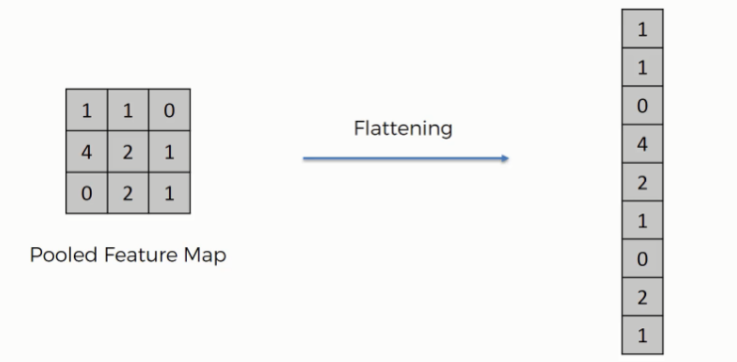

The code below represents the flattening layer.

In [ ]:
cnn.add(tf.keras.layers.Flatten())

## (2)(d) The Fully Connected Layer
I have posted a notebook about this concept. Click the [link](https://github.com/codemasterady/Phone-Price-Predictor/blob/main/About_The_Model.ipynb) to learn more. Here is the fully connected layer is shown below.

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## (2)(e) Compilation

This model is compiled using the **[Stochastic Gradient Descent](https://github.com/codemasterady/Phone-Price-Predictor/blob/main/About_The_Model.ipynb)** optimizer and the **binary_cross entropy** loss.

In [ ]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## (2)(f) Fitting The Training & Validation Data Into The Training & Test Set
This line of code is used to start the training. Notice that this line is wrapped by two "time lines" of code. These lines are used to calculate the time taken to train the model.

In [ ]:
tic = time.time()
cnn.fit(x=training_set, validation_data=test_set, epochs=50)
toc = time.time()

# (3) Experimentation
In this section, we will focus on **parameter tuning** i.e changing the parameters in the algorithm to obtain the **highest accuracy**. The base parameters for the algorithm is the one as provided above with **10 Conv Layers**, **6 Max-Pool Layers**, 50 **epochs**, 1 **fully-connected layer** and so on. Let us look at all the cases and choose the best one.

## (3)(a) Base Case
This is the beginning case, sort of like a **calibration** that is used to deduce the metric for the other cases. Below are the **key parameters** to focus on

1. The Fully-Connected layer.
2. The number of epochs.
3. The batch size.

### Below are the code examples depicting this concept
1. ```
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
```
2. ```
cnn.fit(x=training_set, validation_data=test_set, epochs=50)
```
3. ```
training_set = train_datagen.flow_from_directory(
    r'chest_xray/train',
    target_size = (416, 416),
    batch_size = 32,
    class_mode = 'binary'
    )
```
## Results

